In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

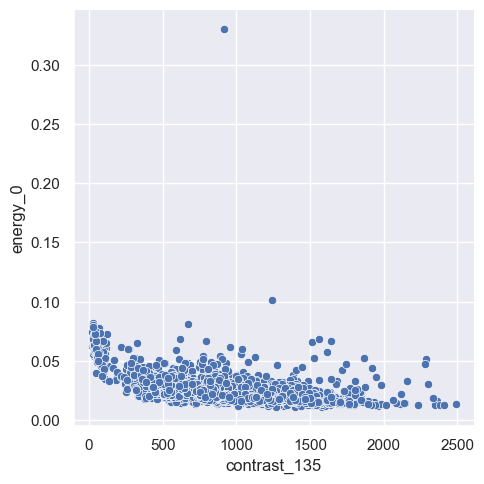

In [4]:
data=pd.read_excel(r"C:\Users\ADMIN DELL\Downloads\GLCM_extended_dataset.xlsx")
sns.relplot(data, x="contrast_135", y="energy_0")

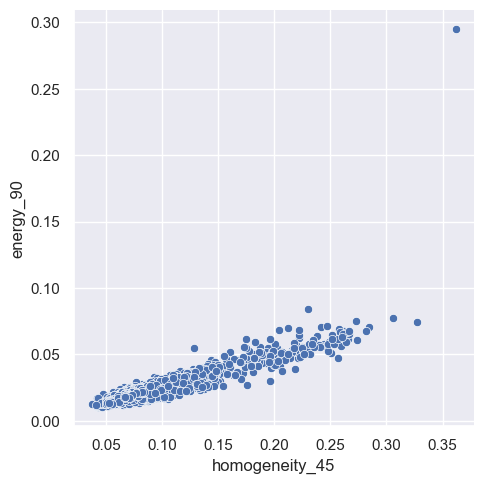

In [5]:
data=pd.read_excel(r"C:\Users\ADMIN DELL\Downloads\GLCM_extended_dataset.xlsx")
sns.relplot(data, x="homogeneity_45", y="energy_90")

Coefficients: 
 [1.12119664]
Mean squared error: 9.02
Coefficient of determination: 0.70


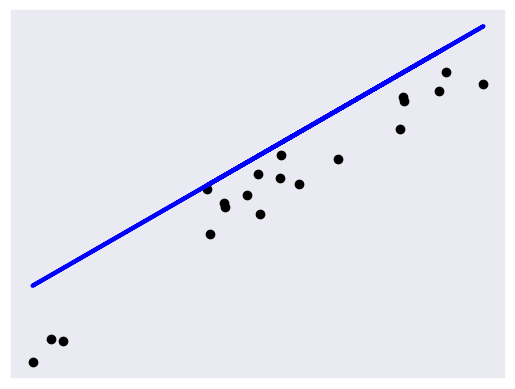

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_excel("GLCM_extended_dataset.xlsx")

# Extract the input feature (X) and the target variable (y)
GLCM_extended_dataset_X = data[['dissimilarity_0']] 
GLCM_extended_dataset_y = data['dissimilarity_45']  

# Use only one feature (adjust column index as needed
# Split the data into training/testing sets
GLCM_extended_dataset_X_train = GLCM_extended_dataset_X[:-20]
GLCM_extended_dataset_X_test = GLCM_extended_dataset_X[-20:]

GLCM_extended_dataset_y_train = GLCM_extended_dataset_y[:-20]
GLCM_extended_dataset_y_test = GLCM_extended_dataset_y[-20:]

# Create linear regression object
regression = linear_model.LinearRegression()

# Train the model using the training sets
regression.fit(GLCM_extended_dataset_X_train, GLCM_extended_dataset_y_train)

# Make predictions using the testing set
GLCM_extended_dataset_y_pred = regression.predict(GLCM_extended_dataset_X_test)

# The coefficients
print("Coefficients: \n", regression.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(GLCM_extended_dataset_y_test, GLCM_extended_dataset_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(GLCM_extended_dataset_y_test, GLCM_extended_dataset_y_pred))

# Plot outputs
plt.scatter(GLCM_extended_dataset_X_test, GLCM_extended_dataset_y_test, color="black")
plt.plot(GLCM_extended_dataset_X_test, GLCM_extended_dataset_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set the threshold value
threshold = 0.5
data_cleaned = data.dropna(subset=['correlation_90', 'homogeneity_0'])
# Convert 'correlation_90' into binary classes
data_cleaned['correlation_90_binary'] = (data_cleaned['correlation_90'] > threshold).astype(int)

# Rest of the code remains unchanged
X = data_cleaned[['homogeneity_0']]
y = data_cleaned['correlation_90_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)


Accuracy: 0.86
Confusion Matrix:
 [[561   0]
 [ 90   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       561
           1       0.00      0.00      0.00        90

    accuracy                           0.86       651
   macro avg       0.43      0.50      0.46       651
weighted avg       0.74      0.86      0.80       651



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

data_cleaned = data.dropna(subset=['correlation_135', 'ASM_135','energy_135'])

# Split the data into the independent variable (X) and the dependent variable (y)

# Select the features and the target variable
X = data_cleaned[['ASM_135','energy_135']]
y = data_cleaned['correlation_135']

# Convert 'correlation_90' to binary class (1 for correlation_90, 0 for non-correlation_90)
y = y.apply(lambda x: 1 if x > 0 else 0)

# Create the regression tree model
model_tree = DecisionTreeRegressor()

# Train the model
model_tree.fit(X, y)

# Make predictions for the same data (for demonstration purposes)
predictions_tree = model_tree.predict(X)

# Calculate Mean Squared Error (MSE) as a measure of model performance
mse_tree = np.mean((predictions_tree - y) ** 2)
print(f"Mean Squared Error (Regression Tree): {mse_tree:.2f}")

# Create the k-NN regressor model
model_knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
model_knn.fit(X, y)

# Make predictions for the same data (for demonstration purposes)
predictions_knn = model_knn.predict(X)

# Calculate Mean Squared Error (MSE) as a measure of model performance
mse_knn = np.mean((predictions_knn - y) ** 2)
print(f"Mean Squared Error (k-NN Regressor): {mse_knn:.2f}")

Mean Squared Error (Regression Tree): 0.00
Mean Squared Error (k-NN Regressor): 0.06


Mean Squared Error (Decision Tree Regressor): 0.00
Mean Squared Error (k-NN Regressor): 0.00


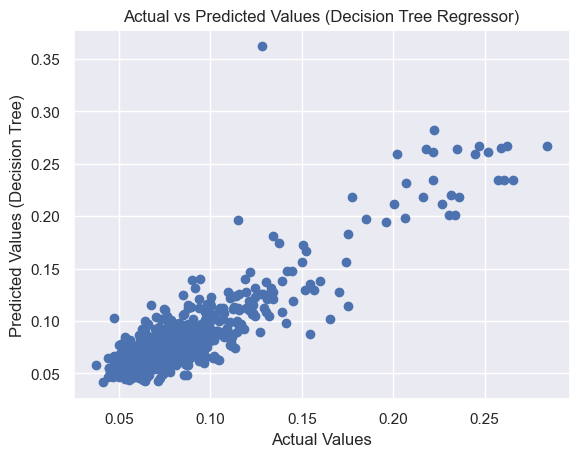

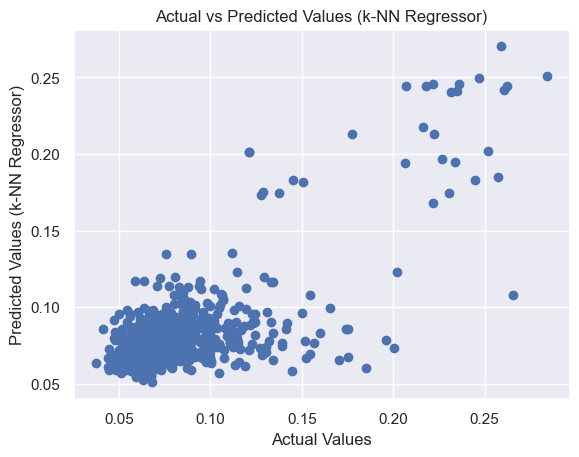

In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Drop rows with missing values in specified columns
data_cleaned = data.dropna(subset=['homogeneity_45', 'contrast_45', 'energy_45'])

# Select features and target variable
X = data_cleaned[['contrast_45', 'energy_45']]
y = data_cleaned['homogeneity_45']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
model_tree = DecisionTreeRegressor()

# Train the model
model_tree.fit(X_train, y_train)

# Make predictions on the test set
predictions_tree = model_tree.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, predictions_tree)
print(f"Mean Squared Error (Decision Tree Regressor): {mse_tree:.2f}")

# k-NN Regressor
model_knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
model_knn.fit(X_train, y_train)

# Make predictions on the test set
predictions_knn = model_knn.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, predictions_knn)
print(f"Mean Squared Error (k-NN Regressor): {mse_knn:.2f}")

# Visualization for Decision Tree Regressor
plt.scatter(y_test, predictions_tree)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Decision Tree)')
plt.title('Actual vs Predicted Values (Decision Tree Regressor)')
plt.show()

# Visualization for k-NN Regressor
plt.scatter(y_test, predictions_knn)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (k-NN Regressor)')
plt.title('Actual vs Predicted Values (k-NN Regressor)')
plt.show()